In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-pastel")

sns.set_theme(
    style="whitegrid",
    palette="pastel",
    context="notebook"
)

In [25]:
df = pd.read_csv("shopping_behavior_updated (2).csv")

In [26]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [28]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [29]:
#null values
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [30]:
#numeric and categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns

In [31]:
correlation = df[num_cols].corr()
correlation

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
Customer ID,1.000000,-0.004079,0.011048,0.001343,-0.039159
Age,-0.004079,1.000000,-0.010424,-0.021949,0.040445
Purchase Amount (USD),0.011048,-0.010424,1.000000,0.030776,0.008063
Review Rating,0.001343,-0.021949,0.030776,1.000000,0.004229
Previous Purchases,-0.039159,0.040445,0.008063,0.004229,1.000000


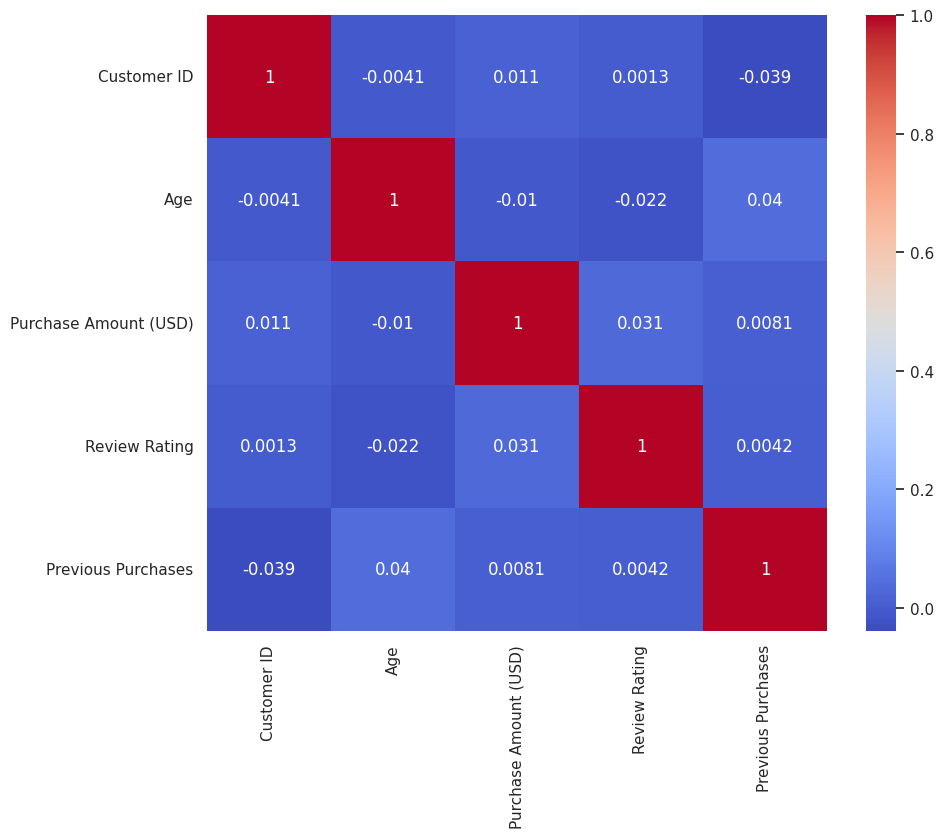

In [32]:
#correlation
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.show()

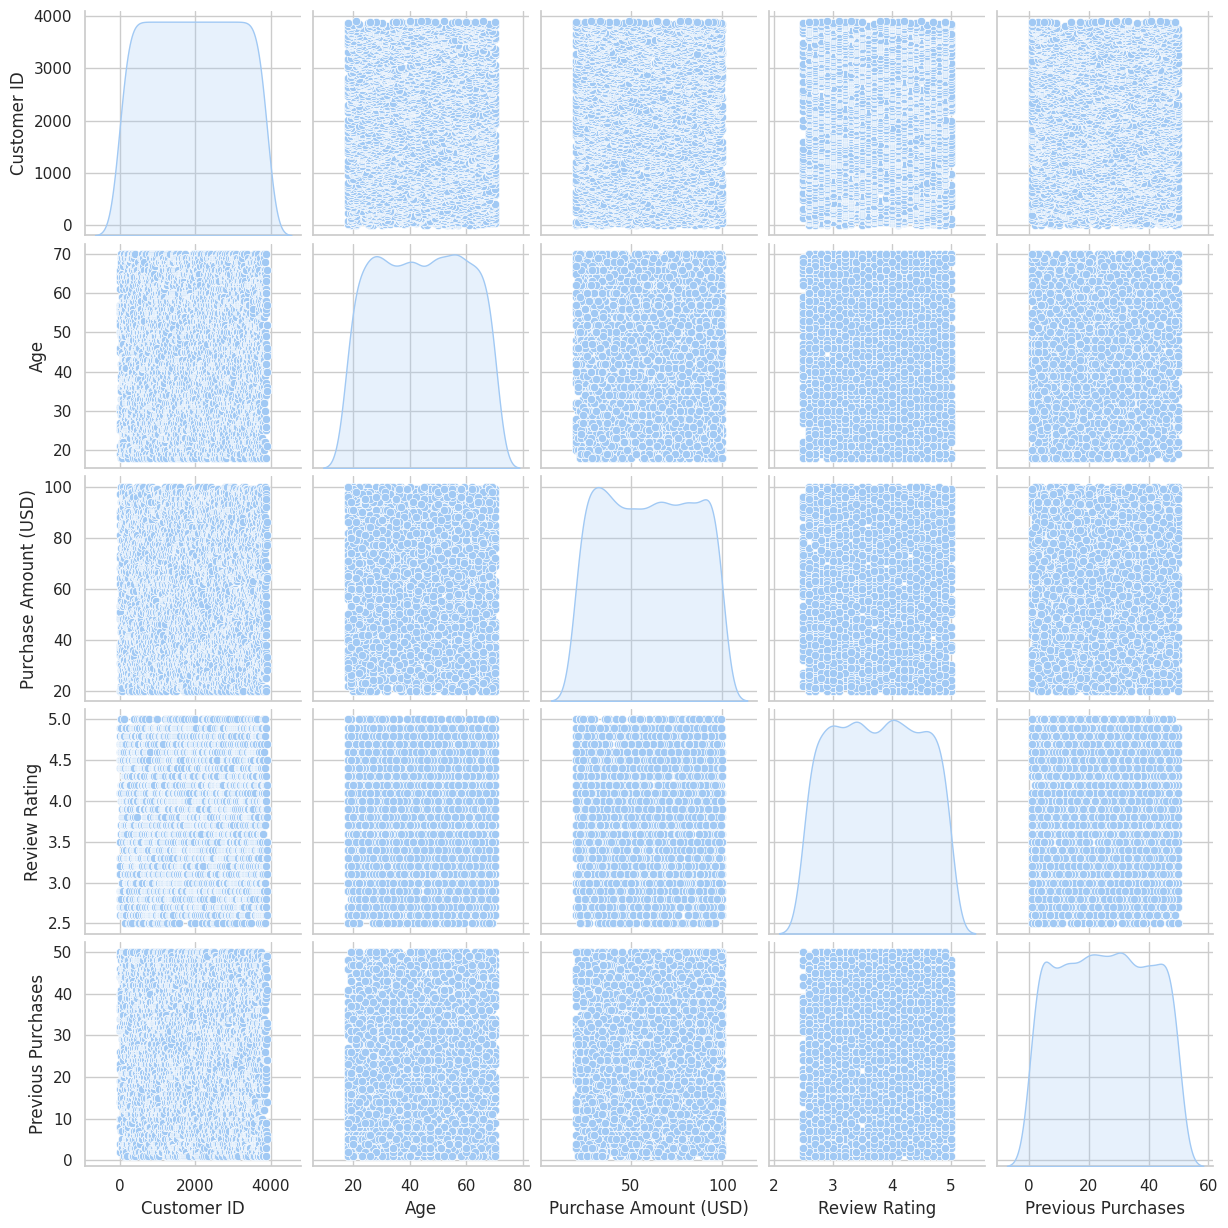

In [33]:
#pairplot
sns.pairplot(df[num_cols], diag_kind="kde")
plt.show()

In [34]:
#item purchased
total_items = df['Item Purchased'].value_counts()
total_items

Item Purchased
Blouse        171
Pants         171
Jewelry       171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Coat          161
Sunglasses    161
Belt          161
Sandals       160
Socks         159
Skirt         158
Scarf         157
Shorts        157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

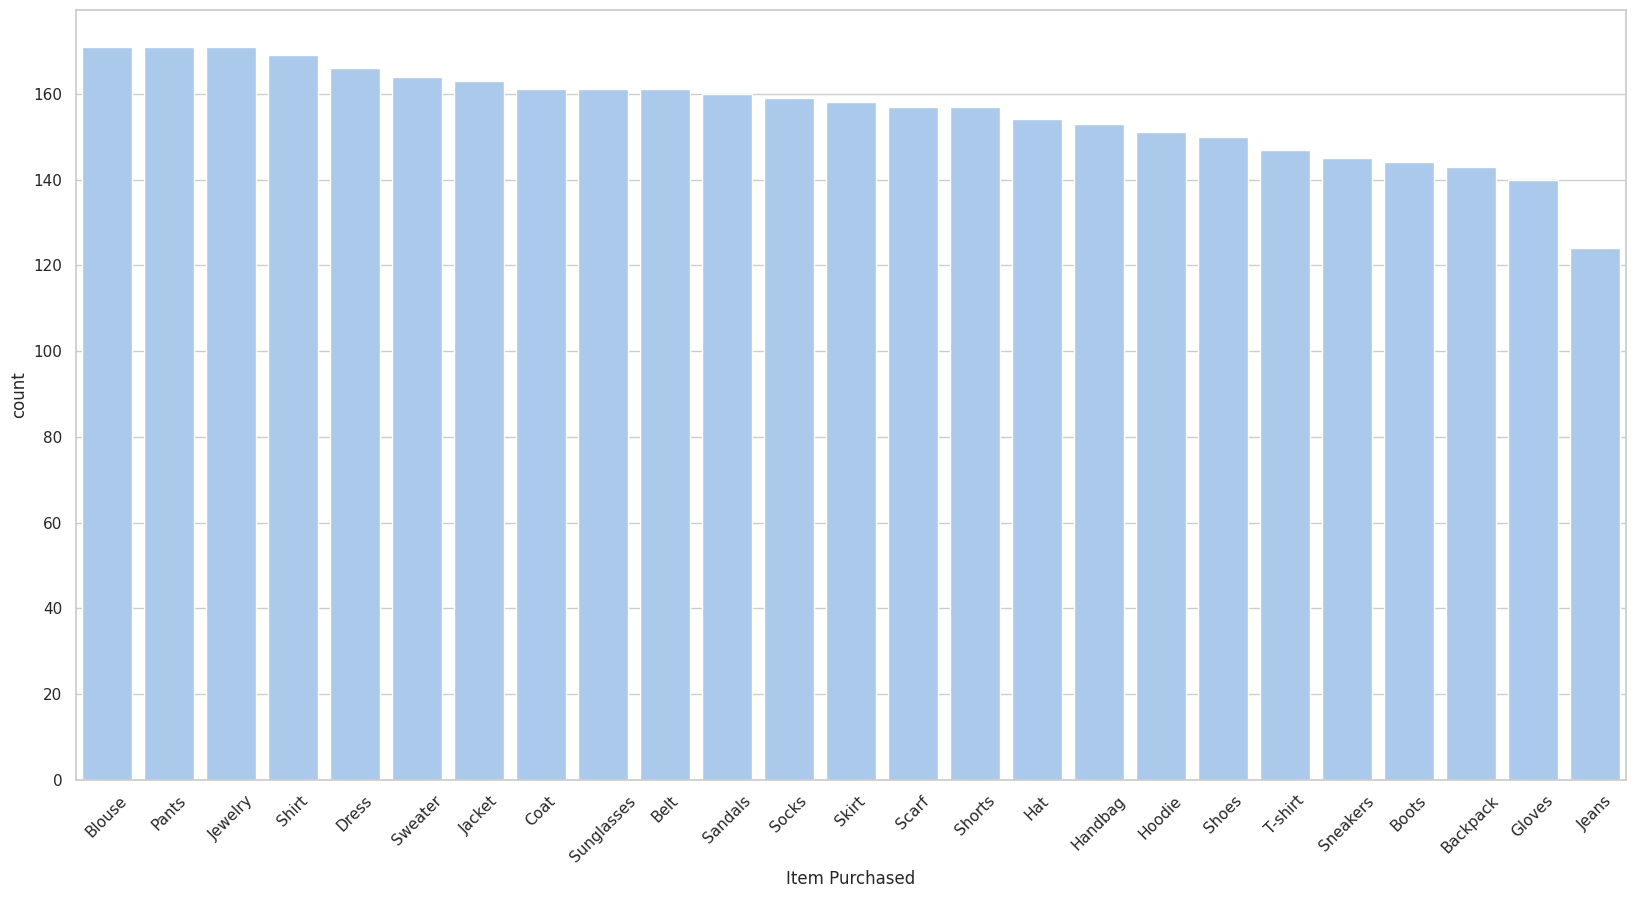

In [35]:
#item purchased
plt.figure(figsize=(20,10))
sns.countplot(x="Item Purchased", data=df, order=total_items.index)
plt.xticks(rotation=45)
plt.show()

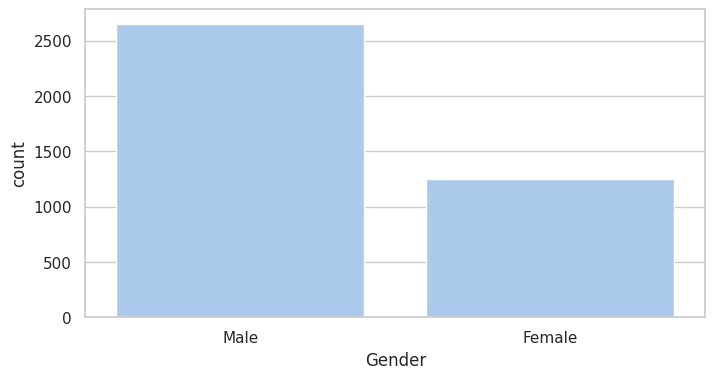

In [36]:
#gender
plt.figure(figsize=(8,4))
sns.countplot(x="Gender", data=df)
plt.show()

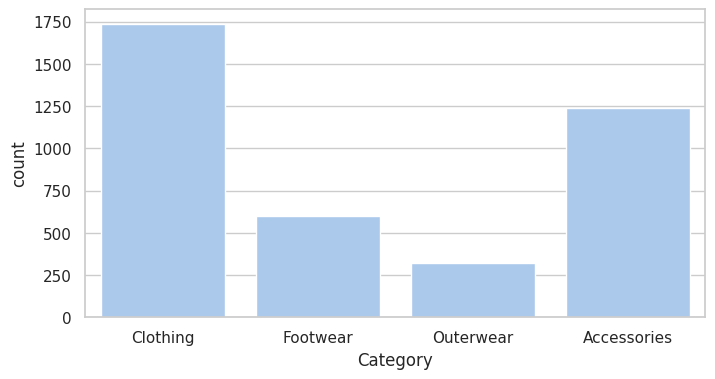

In [37]:
#categories
plt.figure(figsize=(8,4))
sns.countplot(x="Category", data=df)
plt.show()

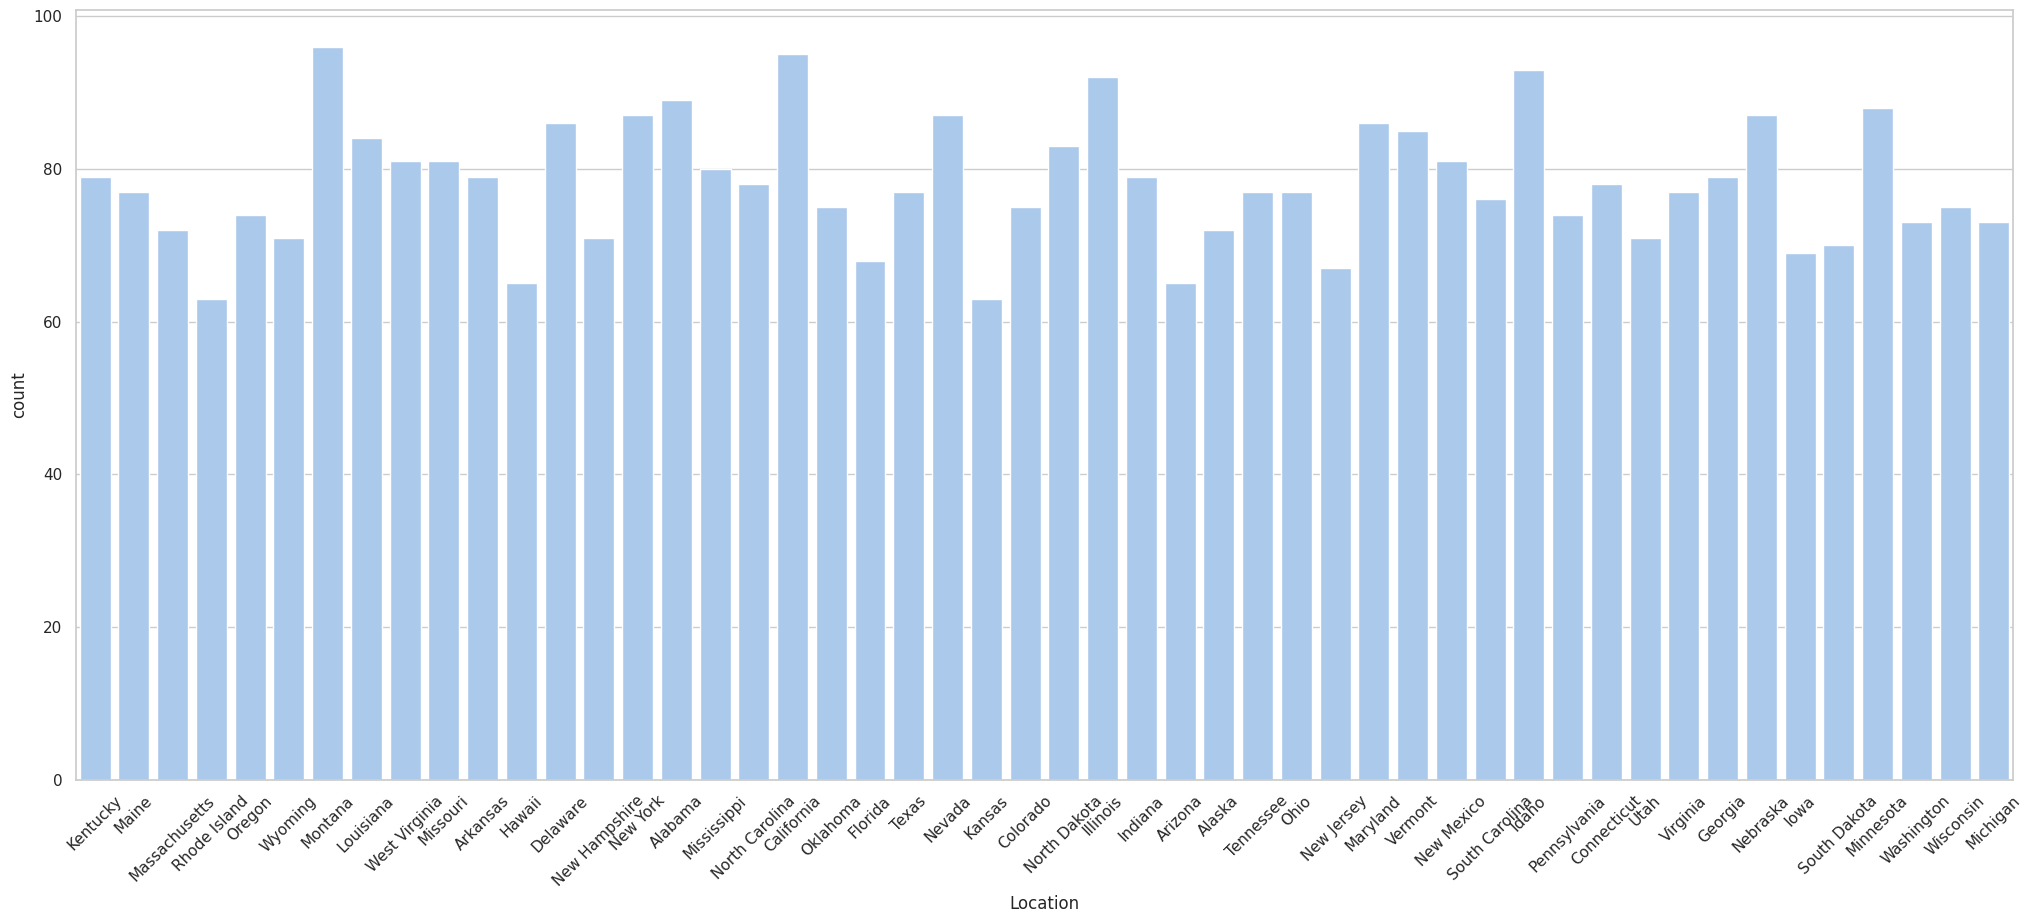

In [40]:
#location
plt.figure(figsize=(25,10))
sns.countplot(x="Location", data=df)
plt.xticks(rotation=45)
plt.show()

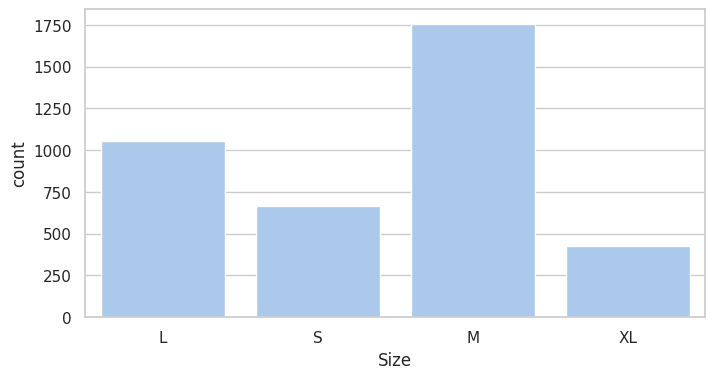

In [41]:
#size
plt.figure(figsize=(8,4))
sns.countplot(x="Size", data=df)
plt.show()

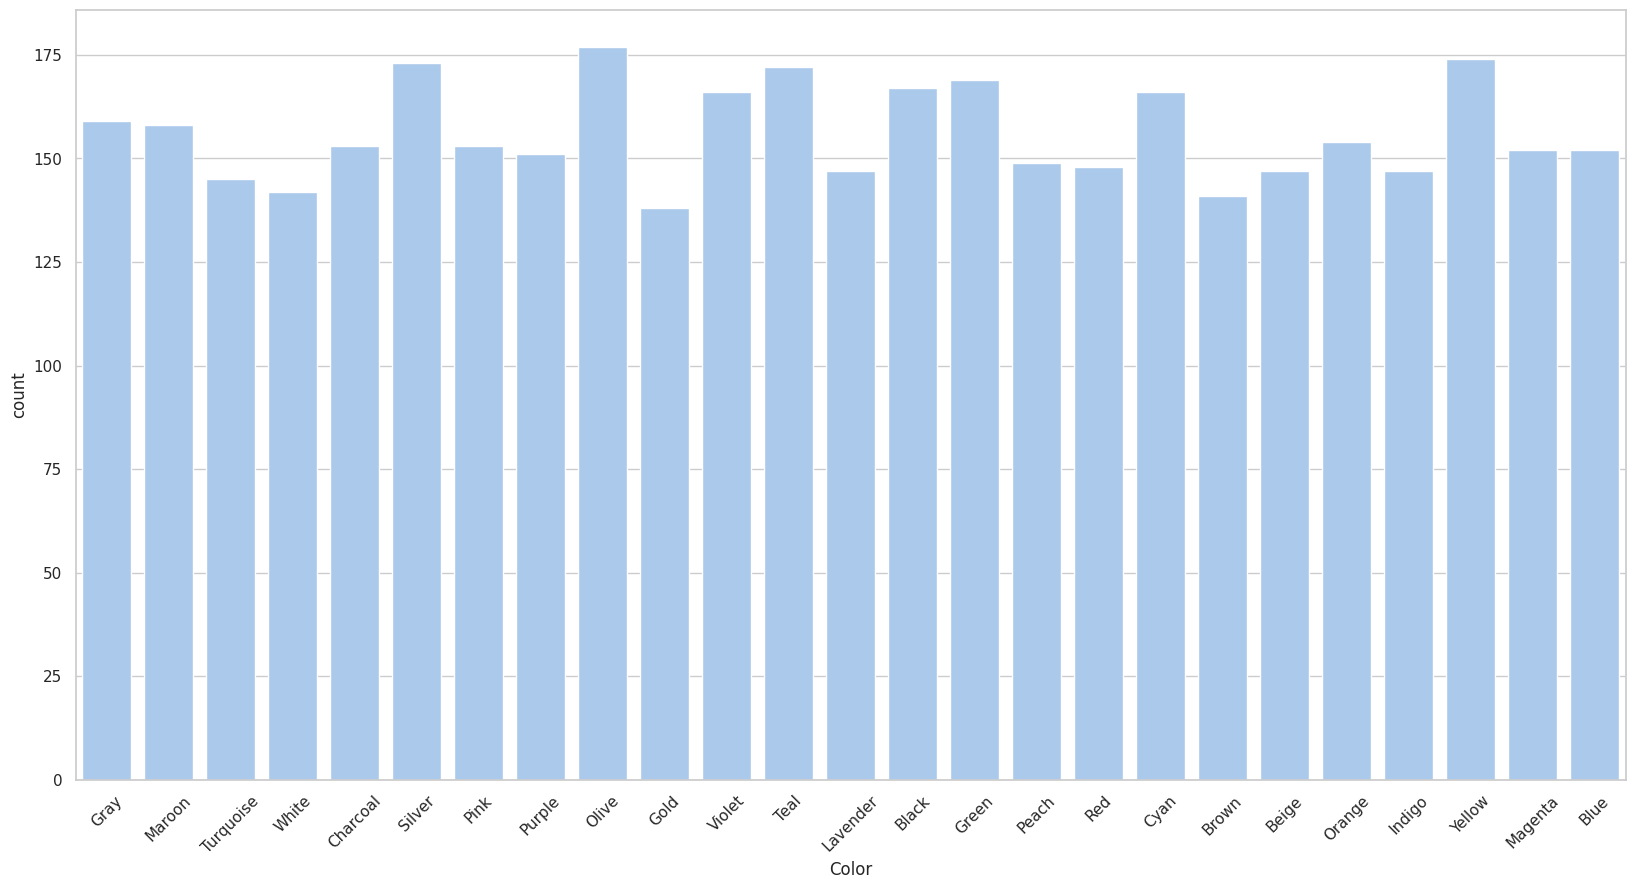

In [43]:
#color
plt.figure(figsize=(20,10))
sns.countplot(x="Color", data=df)
plt.xticks(rotation=45)
plt.show()

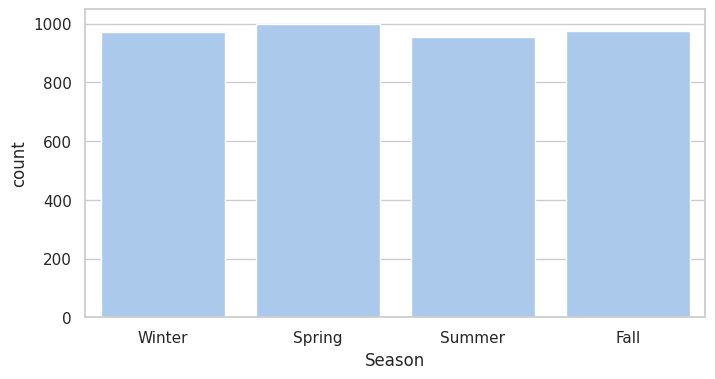

In [44]:
#season
plt.figure(figsize=(8,4))
sns.countplot(x="Season", data=df)
plt.show()

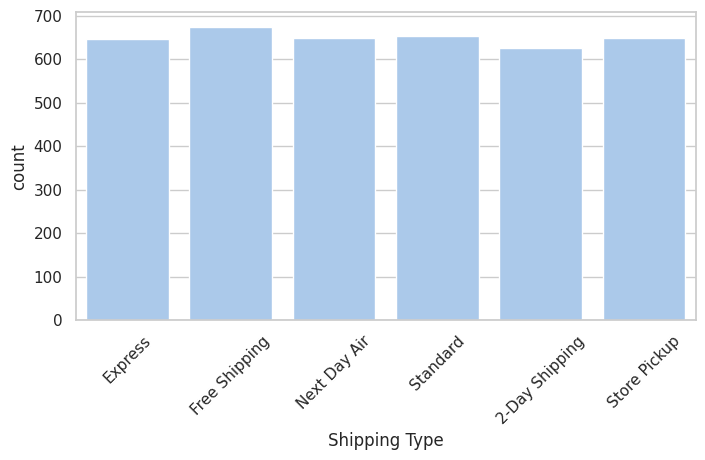

In [46]:
#shipping type
plt.figure(figsize=(8,4))
sns.countplot(x="Shipping Type", data=df)
plt.xticks(rotation=45)
plt.show()

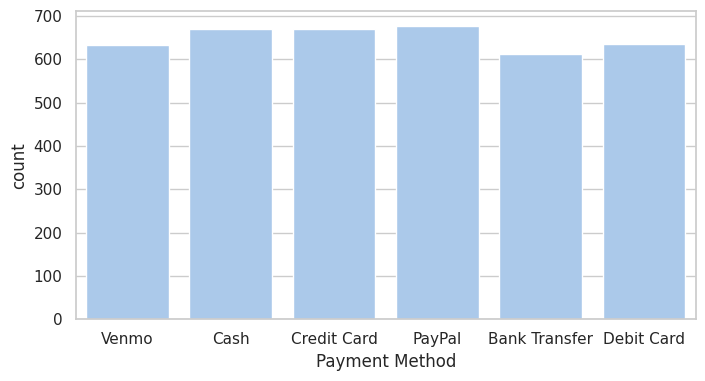

In [47]:
#payment method
plt.figure(figsize=(8,4))
sns.countplot(x="Payment Method", data=df)
plt.show()

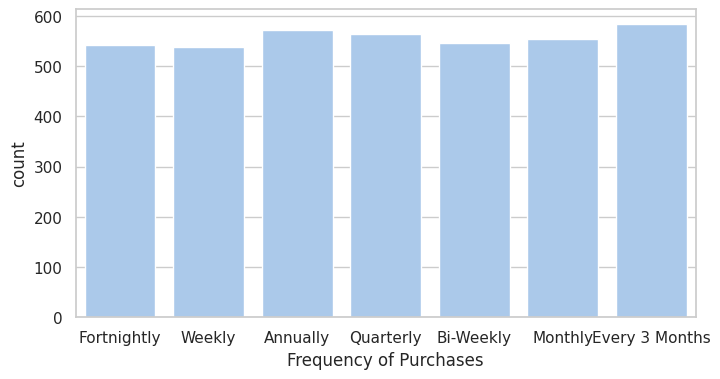

In [48]:
#frequency of purchases
plt.figure(figsize=(8,4))
sns.countplot(x="Frequency of Purchases", data=df)
plt.show()

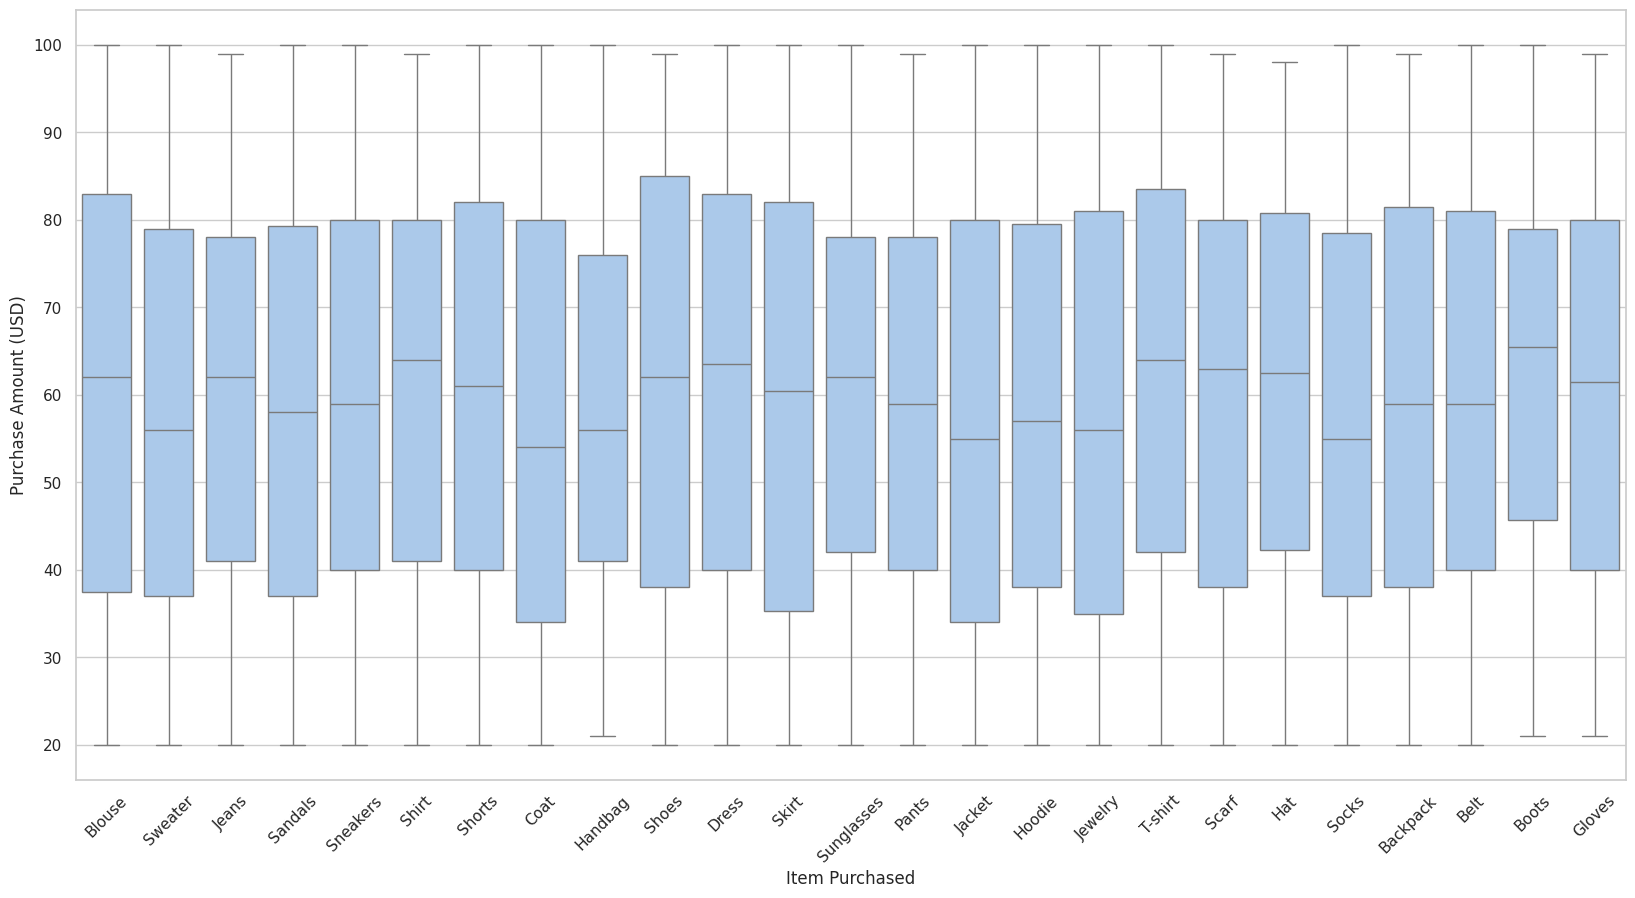

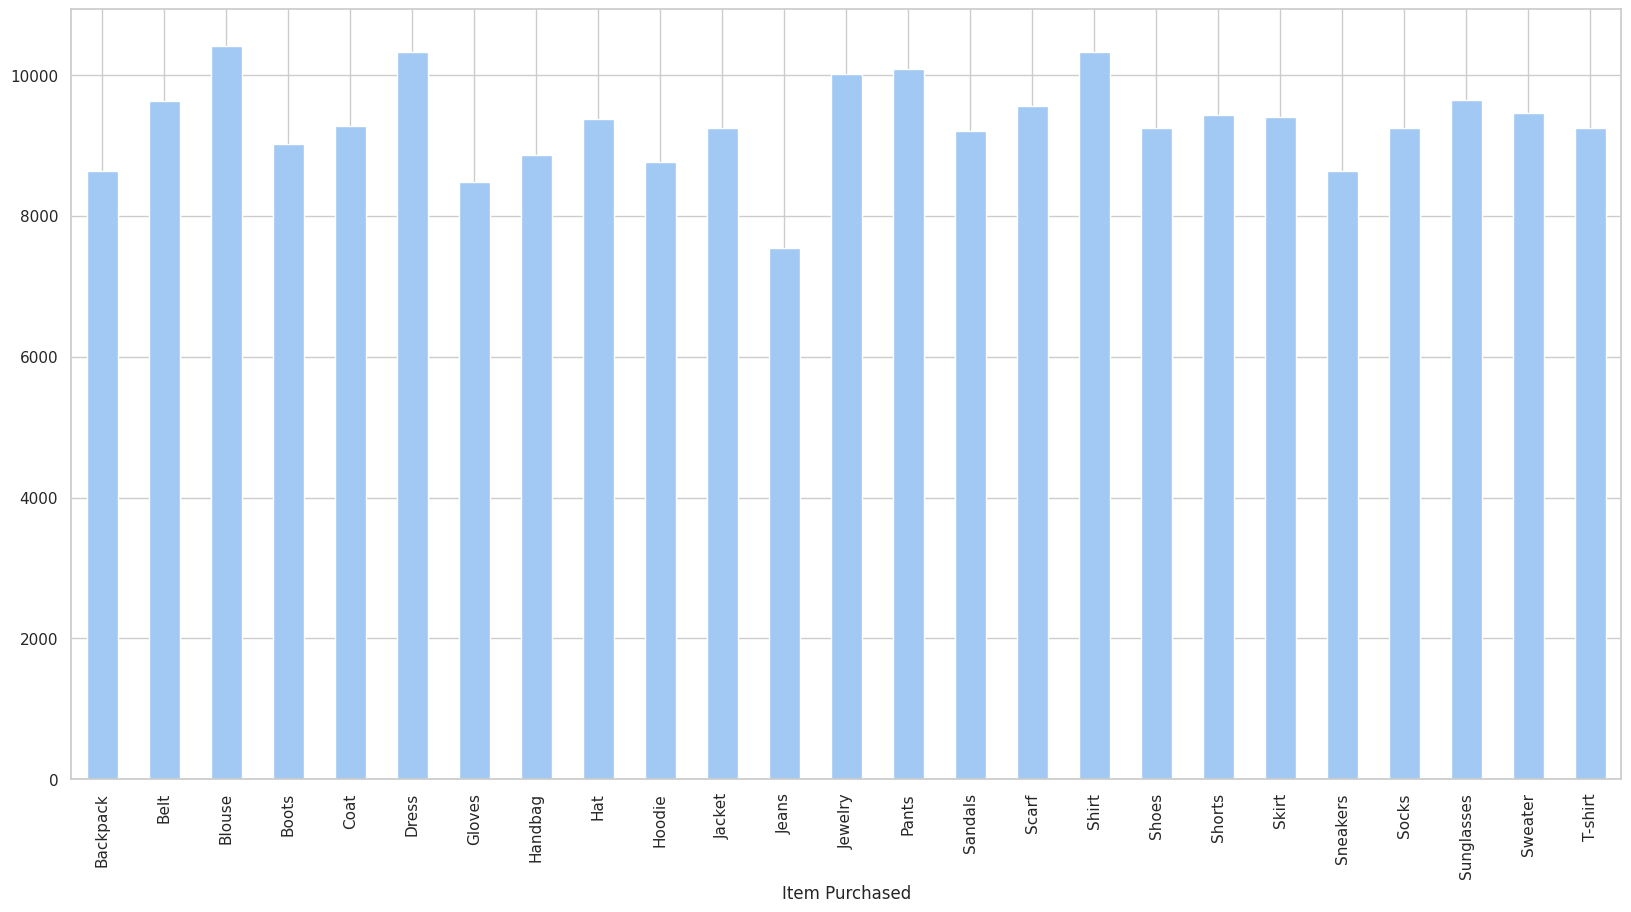

In [61]:
#purchased amount per item
plt.figure(figsize=(20,10))
sns.boxplot(x="Item Purchased", y="Purchase Amount (USD)", data=df)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,10))
df.groupby("Item Purchased")["Purchase Amount (USD)"].sum().plot(kind="bar")
plt.show()

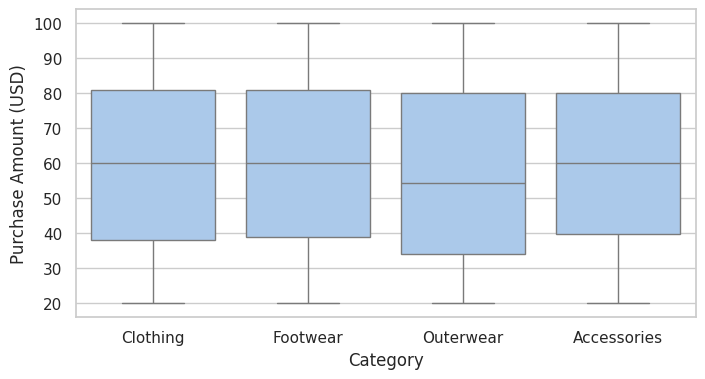

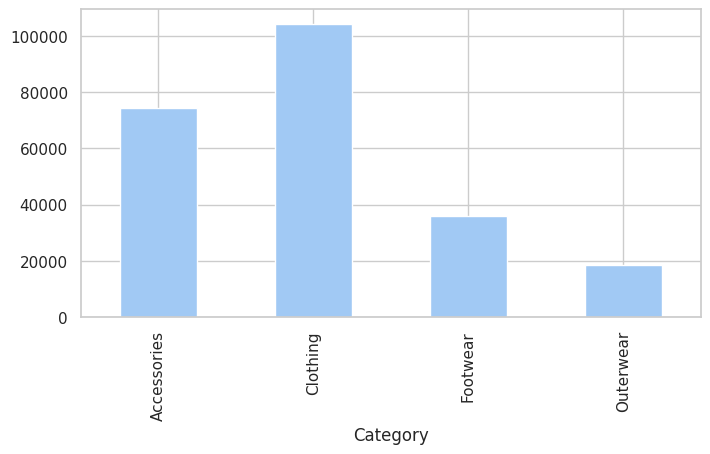

In [63]:
#amount per category
plt.figure(figsize=(8,4))
sns.boxplot(x="Category", y="Purchase Amount (USD)", data=df)
plt.show()

plt.figure(figsize=(8,4))
df.groupby("Category")["Purchase Amount (USD)"].sum().plot(kind="bar")
plt.show()

In [55]:
#mean amount per category
amount_per_category = df.groupby("Category")["Purchase Amount (USD)"]
amount_per_category.mean()

Category
Accessories    59.838710
Clothing       60.025331
Footwear       60.255426
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64

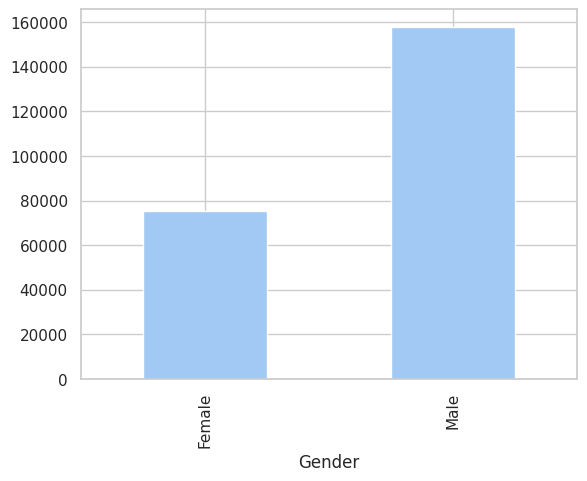

In [59]:
#amount per gender
df.groupby("Gender")["Purchase Amount (USD)"].sum().plot(kind="bar")
plt.show()

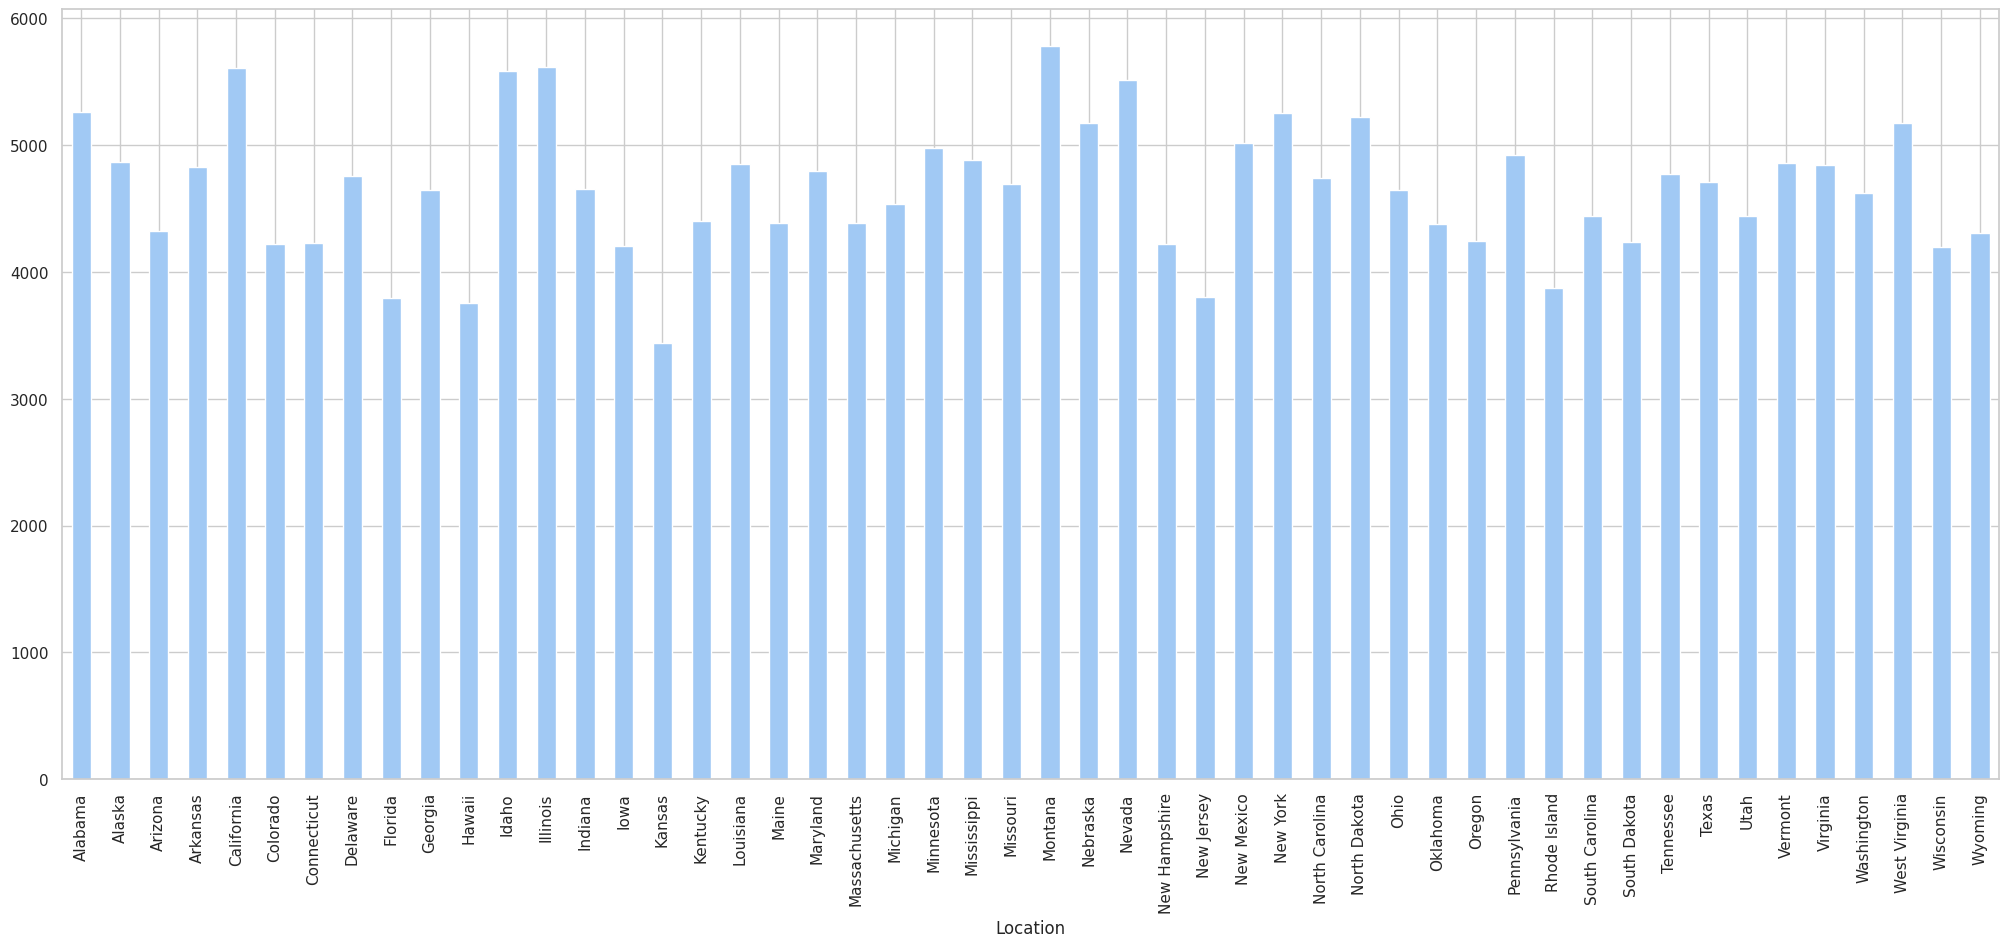

In [67]:
#amount per location
plt.figure(figsize=(25,10))
df.groupby("Location")["Purchase Amount (USD)"].sum().plot(kind="bar")
plt.show()

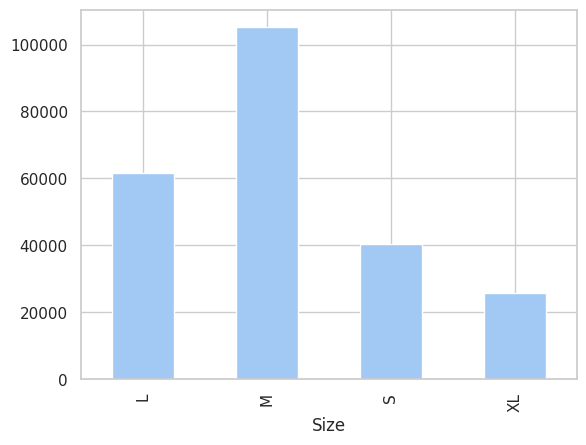

In [71]:
#amount per size
df.groupby("Size")["Purchase Amount (USD)"].sum().plot(kind="bar")
plt.show()

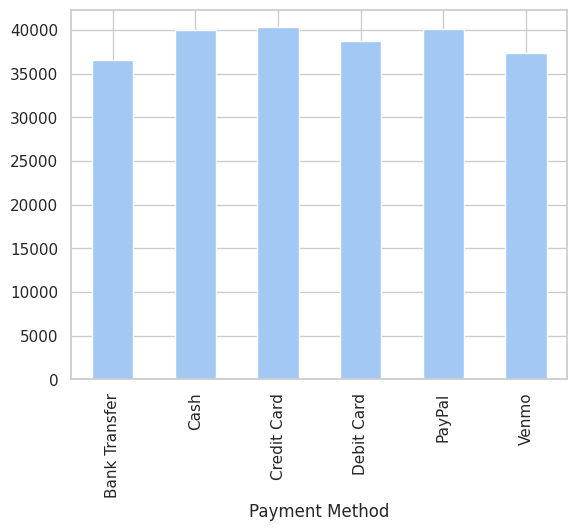

In [72]:
#amount per payment type
df.groupby("Payment Method")["Purchase Amount (USD)"].sum().plot(kind="bar")
plt.show()

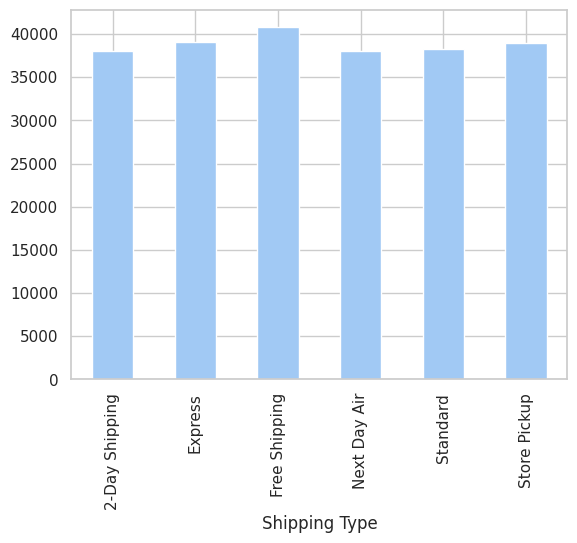

In [73]:
#amount per shipping type
df.groupby("Shipping Type")["Purchase Amount (USD)"].sum().plot(kind="bar")
plt.show()

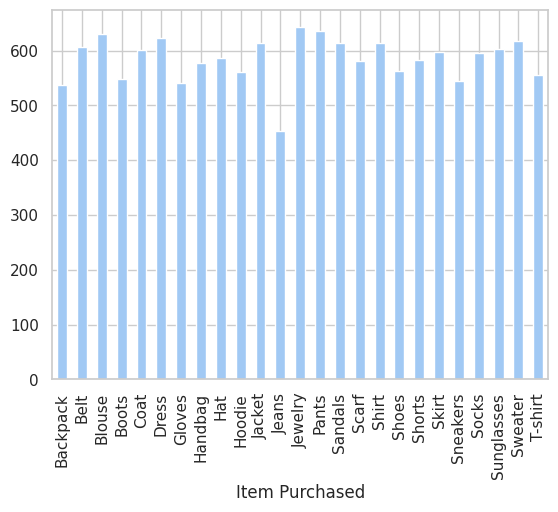

In [78]:
#rating per item purchased
df.groupby("Item Purchased")["Review Rating"].sum().plot(kind="bar")
plt.show()

In [79]:
#total amount
print(df["Purchase Amount (USD)"].sum())

233081
